# Decision trees are used for both classification and regression problems

A decision tree is a tree where each node represents a feature(attribute), each link(branch) represents a decision(rule) 
and each leaf represents an outcome(categorical or continues value).

The whole idea is to create a tree like this for the entire data and process a single outcome at every leaf(or minimize the error in every leaf)

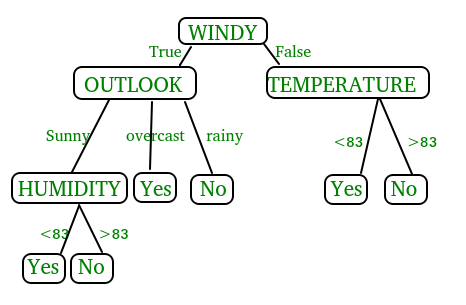

In [2]:
from IPython.display import Image
Image(filename=r'E:\ML\decision tree\sample.png')

# types
ID3 (Iterative Dichotomiser 3)  -------Entropy          
C4.5 (successor of ID3)   
CART (Classification And Regression Tree)  ------- Gini index
...

#Classification with using the ID3 algorithm.

Let’s just take a famous dataset in the machine learning world which is weather dataset(playing game Y or N based on weather condition).


We have four X values (outlook,temp,humidity and windy) being categorical and one y value (play Y or N) also being categorical.

so we need to learn the mapping (what machine learning always does) between X and y.

This is a binary classification problem, lets build the tree using the ID3 algorithm

To create a tree, we need to have a root node first and we know that nodes are features/attributes(outlook,temp,humidity and windy),

so which one do we need to pick first??
Answer: determine the attribute that best classifies the training data; use this attribute at the root of the tree. Repeat this process at for each branch.

This means we are performing top-down, greedy search through the space of possible decision trees.

okay so how do we choose the best attribute?
Answer: use the attribute with the highest information gain in ID3

In order to define information gain precisely, we begin by defining a measure commonly used in information theory, called entropy that characterizes the (im)purity of an arbitrary collection of examples.”



# Gini index

Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.
It means an attribute with lower gini index should be preferred.
Sklearn supports “gini” criteria for Gini Index and by default, it takes “gini” value.

# Entropy

Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy the more the information content

# Information Gain

The entropy typically changes when we use a node in a decision tree to partition the training instances into smaller subsets. Information gain is a measure of this change in entropy.
Sklearn supports “entropy” criteria for Information Gain and if we want to use Information Gain method in sklearn then we have to mention it explicitly.

# Accuracy score

Accuracy score is used to calculate the accuracy of the trained classifier.

# Confusion Matrix

Confusion Matrix is used to understand the trained classifier behavior over the test dataset or validate dataset.

In [5]:
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


In [11]:
# import data
def importdata(): 
    balance_data = pd.read_csv( r'E:\ML\decision tree\balance scale data.csv',sep= ',', header = None) 
    # Printing the dataswet shape 
    print ("Dataset Lenght: ", len(balance_data)) 
    print('\n')
    print ("Dataset Shape: ", balance_data.shape) 
    print('\n')
      
    # Printing the dataset obseravtions 
    print ("Dataset: ",balance_data.head()) 
    print('\n')
    return balance_data 
# Function to split the dataset 
def splitdataset(balance_data): 
  
    # Seperating the target variable 
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 0] 
  
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 
      
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print('\n')
    print(y_pred) 
    print('\n')
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
    print('\n')
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
    print('\n')
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
    print('\n')
  
# Driver code 
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
    print('\n')
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
    print('\n')
      
      
# Calling main function 
if __name__=="__main__": 
    main() 

Dataset Lenght:  625


Dataset Shape:  (625, 5)


Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


Results Using Gini Index:


Predicted values:


['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']


Confusion Matrix:  [[ 

C:\Users\Vitthal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
